# **Sensor Data Analysis**
Otomotive Manufacture Data that contains 500 records and 20 columns, with a wide variety of sensor readings.

**Data Overview:**
*   **Time Series Data:** timestamp
*   **Vehicle Metrics**: engine_temperature_C, oil_pressure_psi, rpm, speed_kmph, fuel_rate_lph, throttle_position_pct, vibration_level, battery_voltage, air_intake_temp_C, manifold_pressure_kPa
*   **Environmental Metrics**: ambient_temp_C, humidity_pct, gps_latitude, gps_longitude, altitude_m
*   **Status Indicators**: gear_position, brake_status, error_code (sparse)





# **Steps for Analysis and Preprocessing**

*   Timestamp Conversion and Sorting
*   Missing Value Analysis
*   Outlier Handling
*   Feature Engineering (Creation, encoding, new category)
*   Correlation and Multicollinearity Analysis






In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the CSV file
file_path = "https://raw.githubusercontent.com/frfusch21/Manufacture-Otomotive-Analysis/refs/heads/main/Data/Sensor_Data.csv"
df = pd.read_csv(file_path)

In [10]:
df.head()

,sensor_id,timestamp,engine_temperature_C,oil_pressure_psi,rpm,speed_kmph,fuel_rate_lph,throttle_position_pct,vibration_level,battery_voltage,air_intake_temp_C,manifold_pressure_kPa,gear_position,brake_status,ambient_temp_C,humidity_pct,gps_latitude,gps_longitude,altitude_m,error_code
0,1102,2025-01-01 00:00:00,96.351126,31.533669,3979,47.117418,6.705483,7.663581,1.069660,12.799348,36.717451,100.590188,6,ON,34.997148,58.038410,-45.936023,-162.735216,362.196064,NaN
1,1435,2025-01-01 01:00:00,79.197991,35.497336,5958,63.659465,3.216243,87.263580,1.182800,12.355380,20.938327,115.735744,1,ON,16.018306,41.333264,32.504957,99.147425,113.701557,NaN
2,1860,2025-01-01 02:00:00,76.943024,41.154720,4454,75.029284,7.645130,82.811683,1.370363,11.826919,41.294136,75.196268,1,OFF,27.608232,32.726593,-68.172319,25.445943,239.305176,NaN
3,1270,2025-01-01 03:00:00,82.492382,36.420121,3159,63.075400,8.820653,21.606012,1.969386,13.176472,26.608466,103.969208,3,OFF,24.751673,26.013727,-69.522847,93.853730,312.624786,NaN
4,1106,2025-01-01 04:00:00,79.745001,43.444191,1244,42.102680,4.926125,80.932440,1.425975,12.780258,40.512183,111.393943,2,ON,23.414299,69.988340,-16.027091,-126.049392,299.013148,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sensor_id              500 non-null    int64  
 1   timestamp              500 non-null    object 
 2   engine_temperature_C   500 non-null    float64
 3   oil_pressure_psi       500 non-null    float64
 4   rpm                    500 non-null    int64  
 5   speed_kmph             500 non-null    float64
 6   fuel_rate_lph          500 non-null    float64
 7   throttle_position_pct  500 non-null    float64
 8   vibration_level        500 non-null    float64
 9   battery_voltage        500 non-null    float64
 10  air_intake_temp_C      500 non-null    float64
 11  manifold_pressure_kPa  500 non-null    float64
 12  gear_position          500 non-null    object 
 13  brake_status           500 non-null    object 
 14  ambient_temp_C         500 non-null    float64
 15  humidi

In [12]:
# Timestamp Conversion and Sorting
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values('timestamp', inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sensor_id              500 non-null    int64         
 1   timestamp              500 non-null    datetime64[ns]
 2   engine_temperature_C   500 non-null    float64       
 3   oil_pressure_psi       500 non-null    float64       
 4   rpm                    500 non-null    int64         
 5   speed_kmph             500 non-null    float64       
 6   fuel_rate_lph          500 non-null    float64       
 7   throttle_position_pct  500 non-null    float64       
 8   vibration_level        500 non-null    float64       
 9   battery_voltage        500 non-null    float64       
 10  air_intake_temp_C      500 non-null    float64       
 11  manifold_pressure_kPa  500 non-null    float64       
 12  gear_position          500 non-null    object        
 13  brake

In [16]:
# Missing Value Analysis
missing_values = df.isnull().sum()
missing_values

,0
sensor_id,0
timestamp,0
engine_temperature_C,0
oil_pressure_psi,0
rpm,0
speed_kmph,0
fuel_rate_lph,0
throttle_position_pct,0
vibration_level,0
battery_voltage,0


No Missing values for this data

## Outlier Handling

In [17]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [18]:
# ID is removed from numeric_columns since this is unique and won't be used for outlier
numeric_columns.remove('sensor_id')

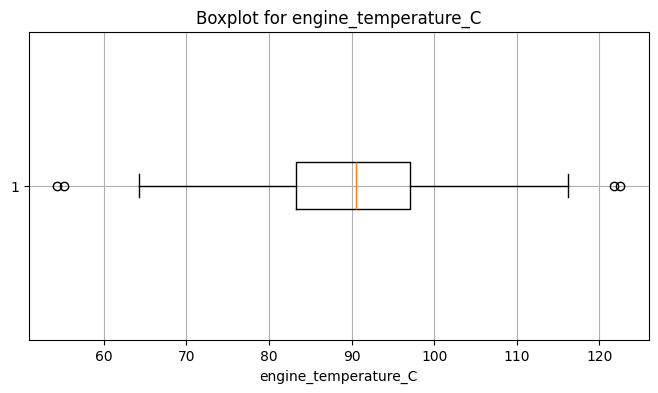

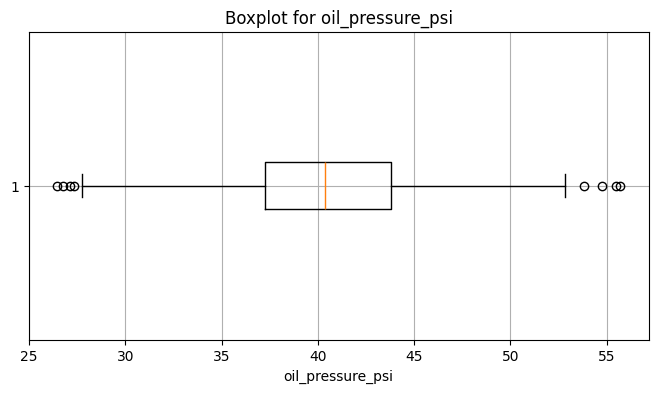

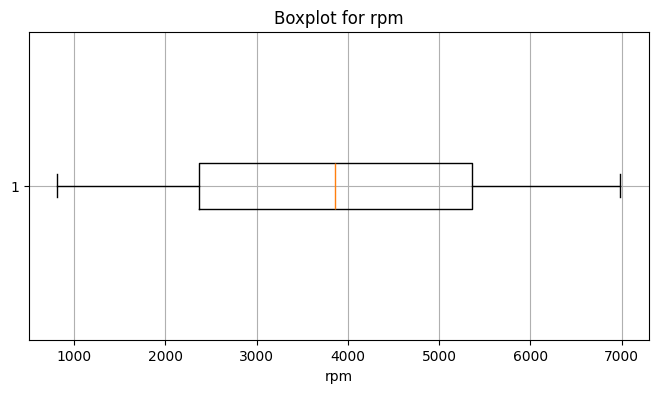

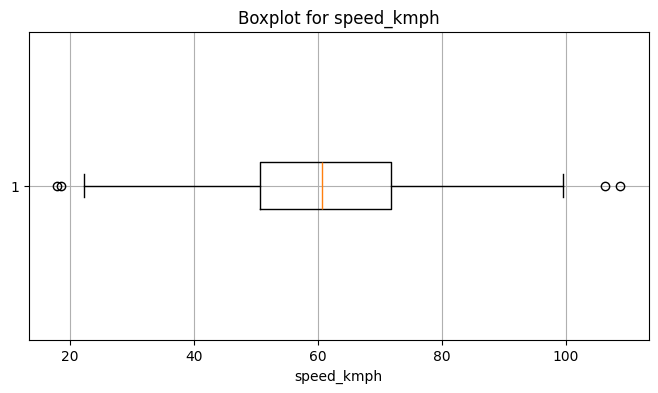

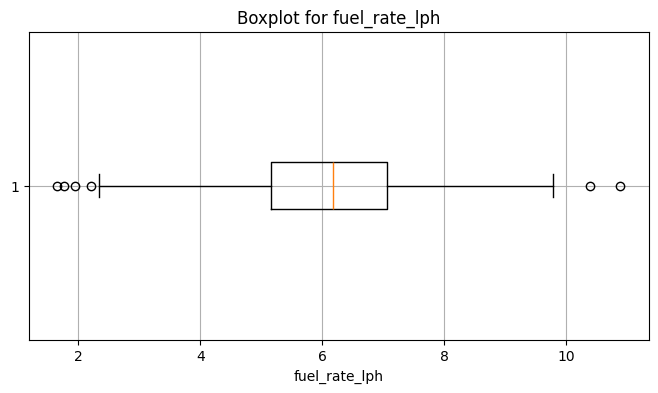

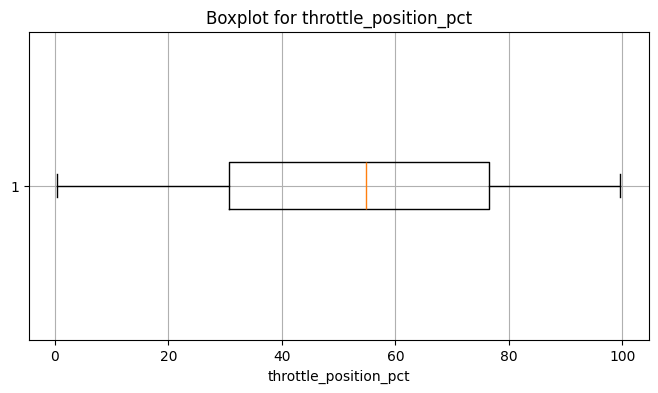

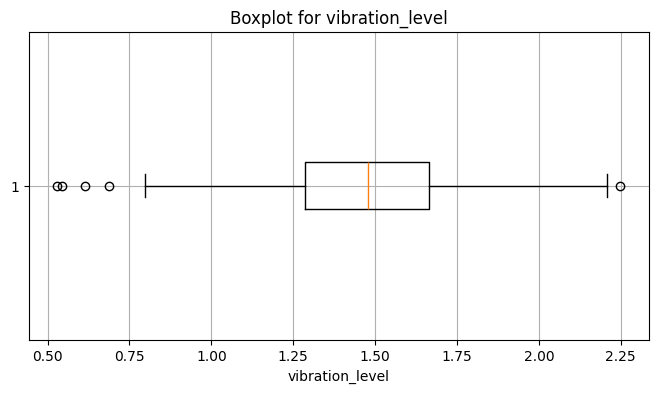

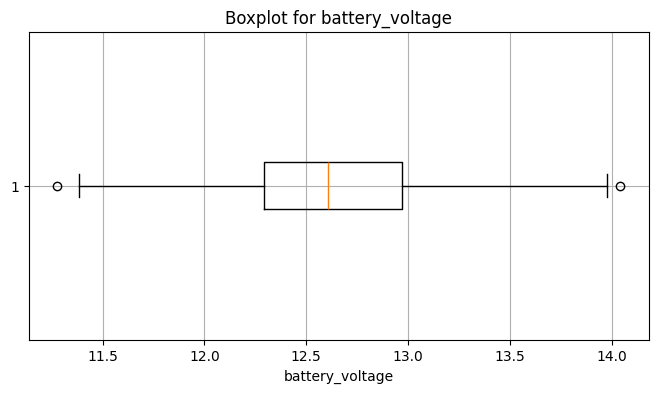

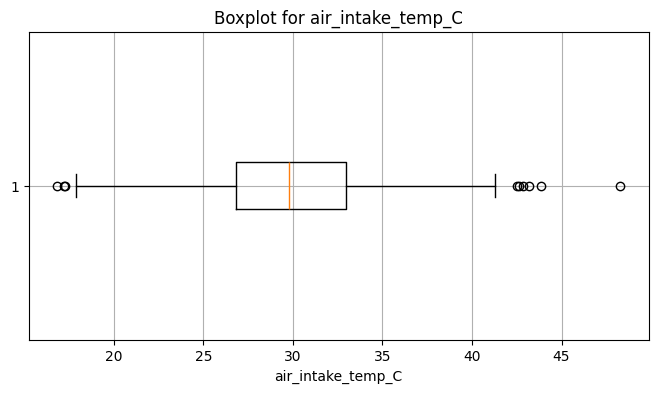

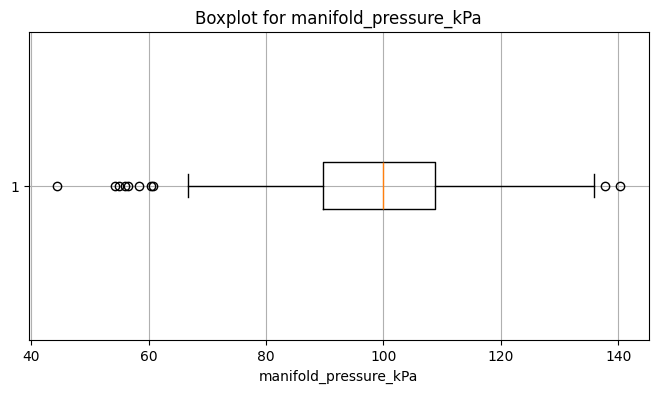

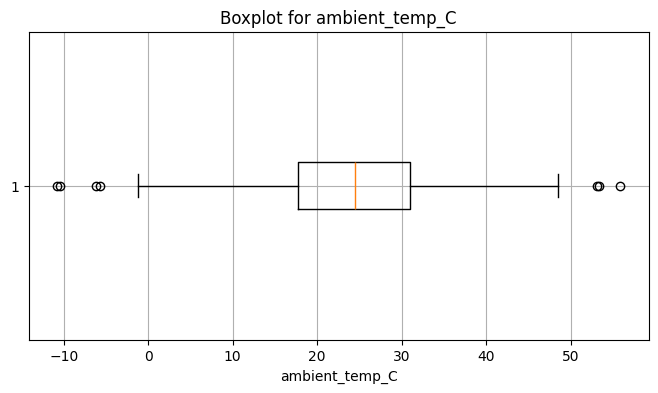

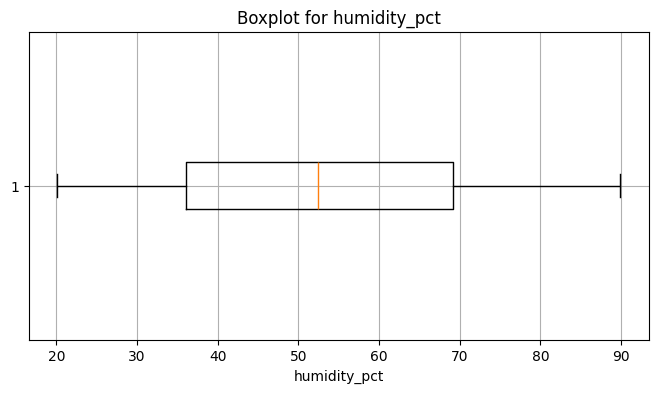

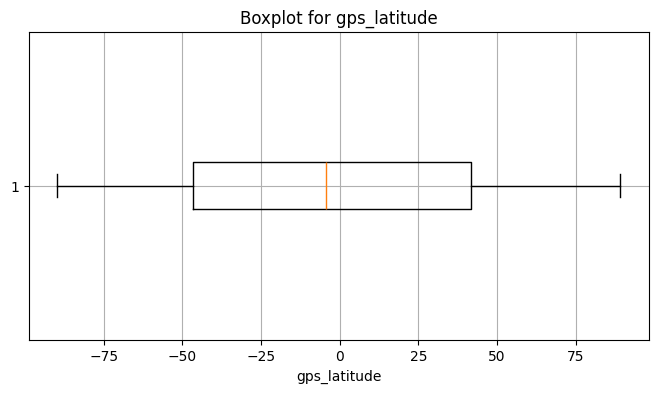

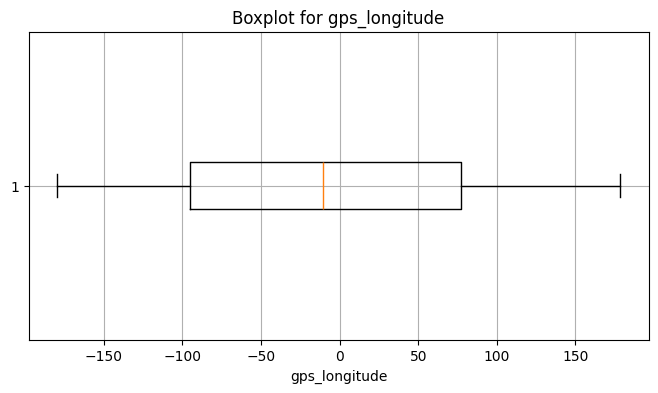

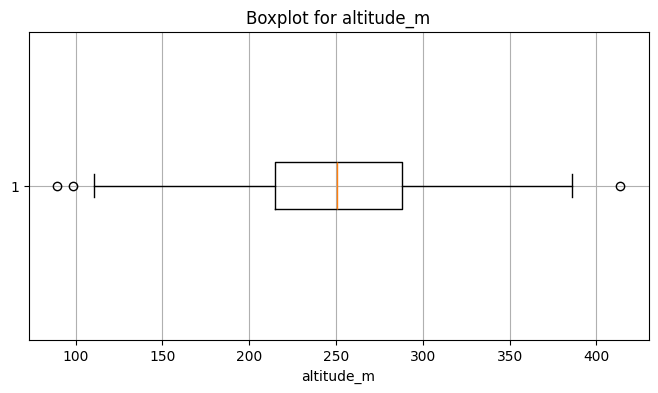

In [20]:
# Function to visualize outliers using boxplots
def visualize_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 4))
        plt.boxplot(df[col], vert=False)
        plt.title(f'Boxplot for {col}')
        plt.xlabel(col)
        plt.grid(True)
        plt.show()

# Visualize outliers for the numeric columns before removing them
visualize_outliers(df, numeric_columns)

Some outlier are detected in several columns. The sum is not that significant. We will have to remove them.

In [21]:
# Function to remove outlier (Upper and lower bound)
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [22]:
df = remove_outliers(df, numeric_columns)

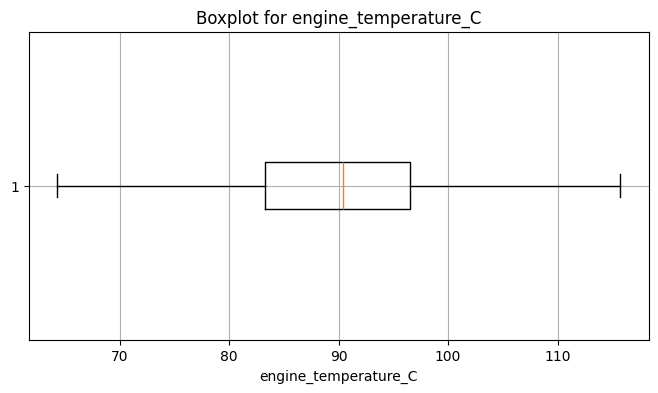

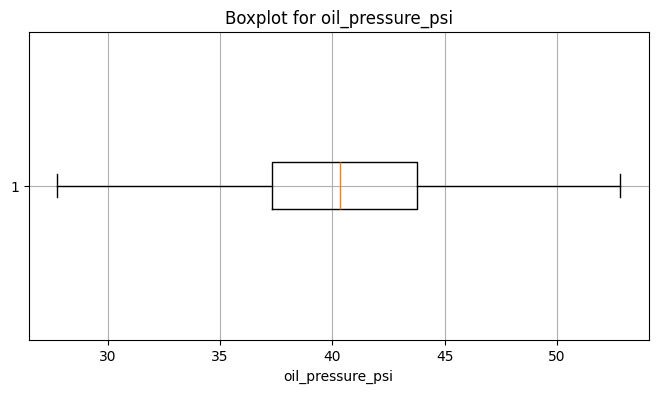

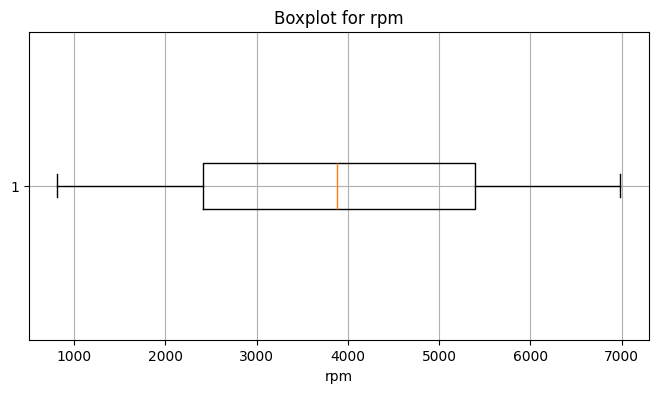

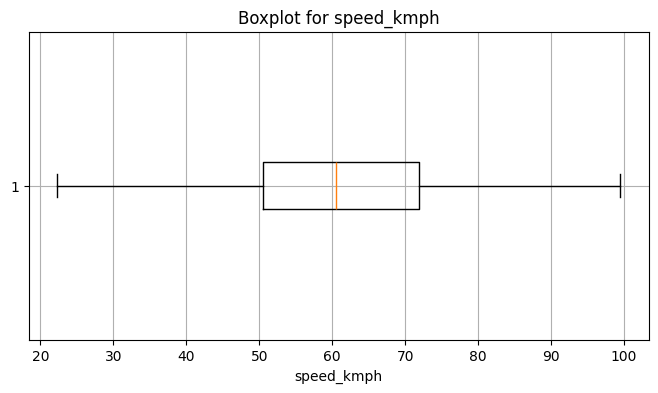

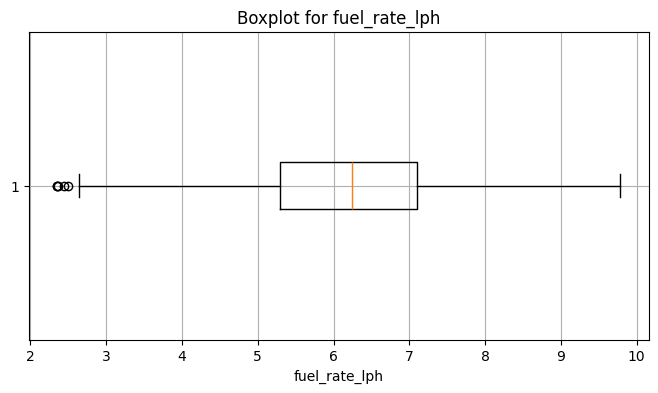

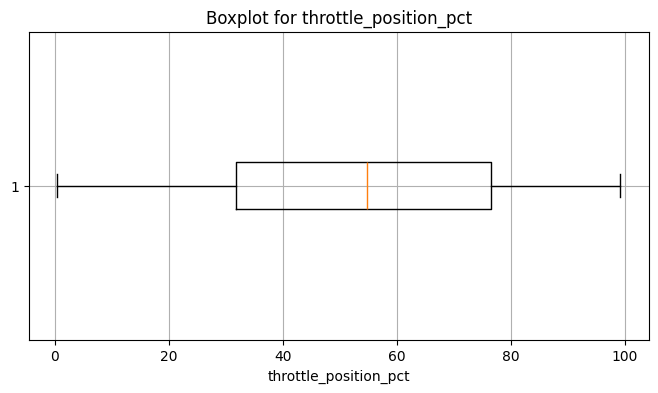

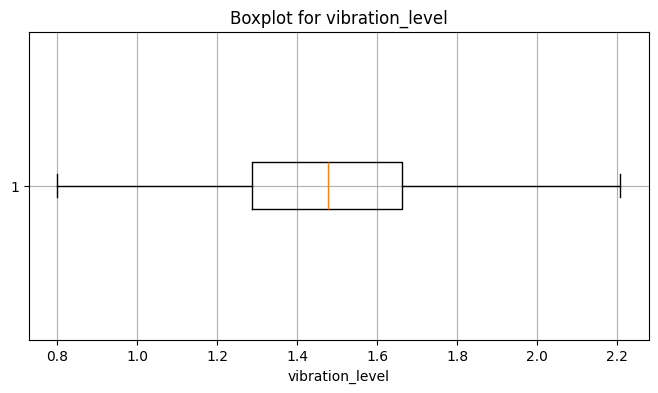

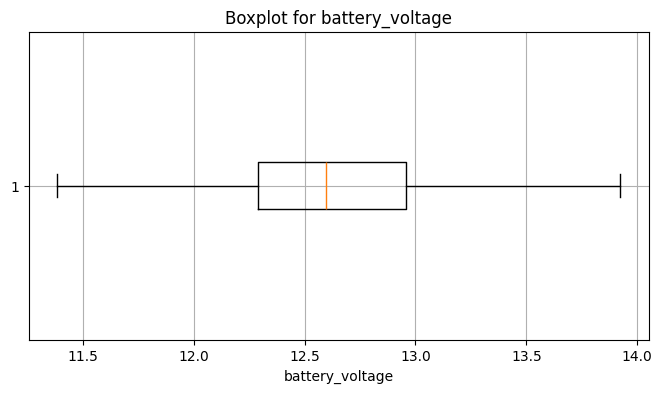

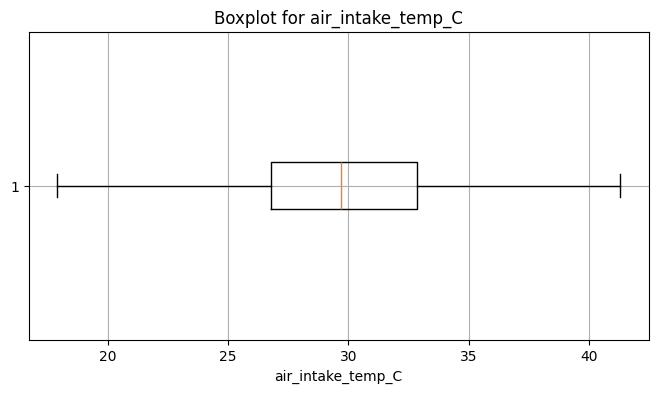

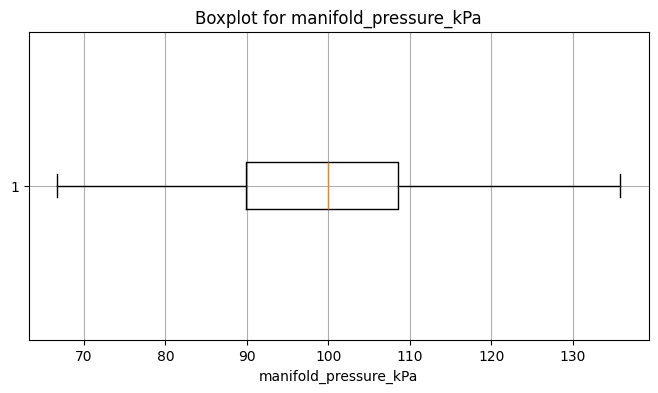

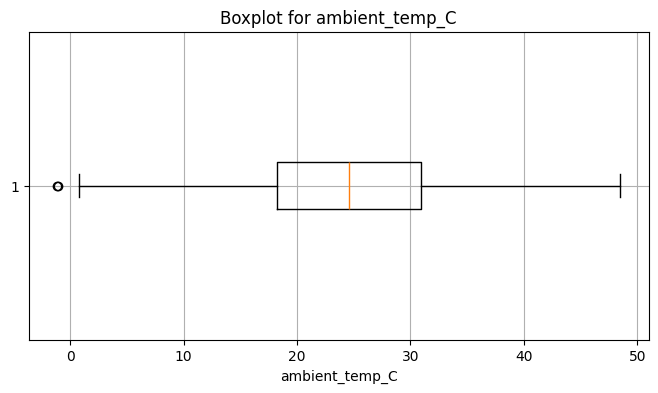

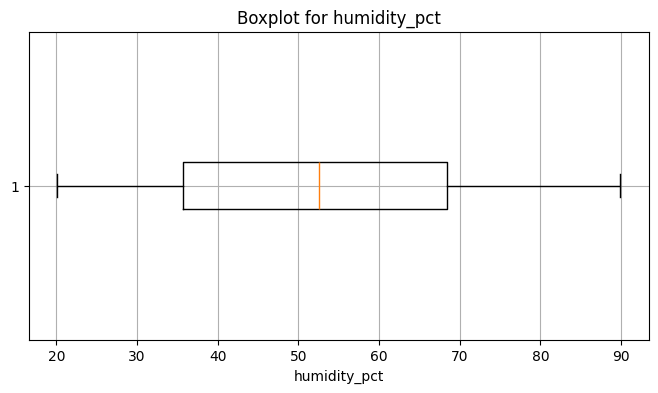

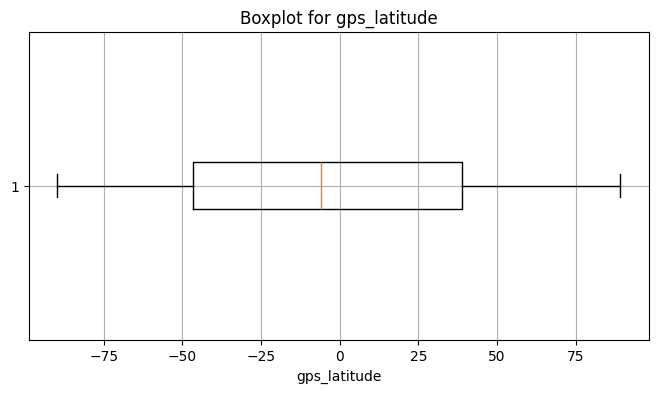

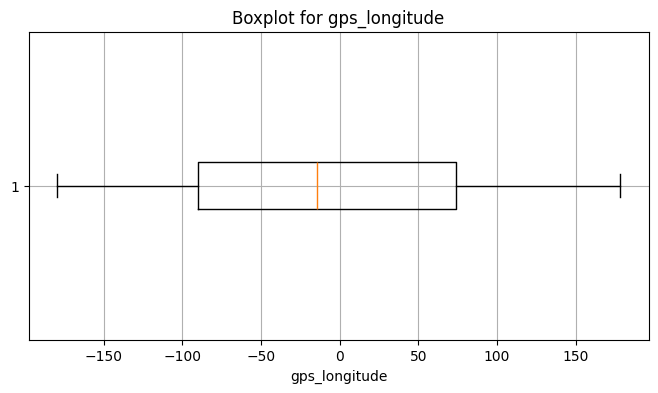

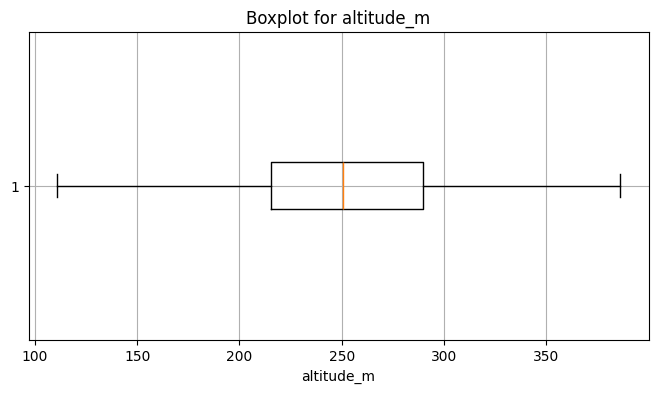

In [23]:
# Visualize after removing outlier
visualize_outliers(df, numeric_columns)

## Data Encoding

In [30]:
# Change astype from object to category (Optional)
df['gear_position'] = df['gear_position'].astype('category')
df['brake_status'] = df['brake_status'].astype('category')
df['error_code'] = df['error_code'].astype('category')

In [31]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['gear_position', 'brake_status','error_code'])
df_encoded

,sensor_id,timestamp,engine_temperature_C,oil_pressure_psi,rpm,speed_kmph,fuel_rate_lph,throttle_position_pct,vibration_level,battery_voltage,...,gear_position_4,gear_position_5,gear_position_6,gear_position_N,brake_status_OFF,brake_status_ON,error_code_E01,error_code_E02,error_code_E03,error_code_E04
0,1102,2025-01-01 00:00:00,96.351126,31.533669,3979,47.117418,6.705483,7.663581,1.069660,12.799348,...,False,False,True,False,False,True,False,False,False,False
1,1435,2025-01-01 01:00:00,79.197991,35.497336,5958,63.659465,3.216243,87.263580,1.182800,12.355380,...,False,False,False,False,False,True,False,False,False,False
2,1860,2025-01-01 02:00:00,76.943024,41.154720,4454,75.029284,7.645130,82.811683,1.370363,11.826919,...,False,False,False,False,True,False,False,False,False,False
3,1270,2025-01-01 03:00:00,82.492382,36.420121,3159,63.075400,8.820653,21.606012,1.969386,13.176472,...,False,False,False,False,True,False,False,False,False,False
4,1106,2025-01-01 04:00:00,79.745001,43.444191,1244,42.102680,4.926125,80.932440,1.425975,12.780258,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1127,2025-01-21 14:00:00,91.432155,35.855360,3125,65.237588,8.039117,65.151568,1.149682,11.768123,...,True,False,False,False,True,False,True,False,False,False
495,1017,2025-01-21 15:00:00,99.782930,40.817387,4554,70.065555,5.641314,21.078145,1.853468,13.124563,...,False,False,False,False,True,False,False,False,False,False
497,1734,2025-01-21 17:00:00,96.233994,47.793400,2524,46.912270,3.021507,85.649340,1.026176,12.627527,...,False,False,True,False,True,False,False,False,False,False
498,1565,2025-01-21 18:00:00,90.130005,34.706803,2176,45.602580,7.286210,83.506595,1.457344,12.420909,...,True,False,False,False,True,False,False,False,False,True


## Check Correlation

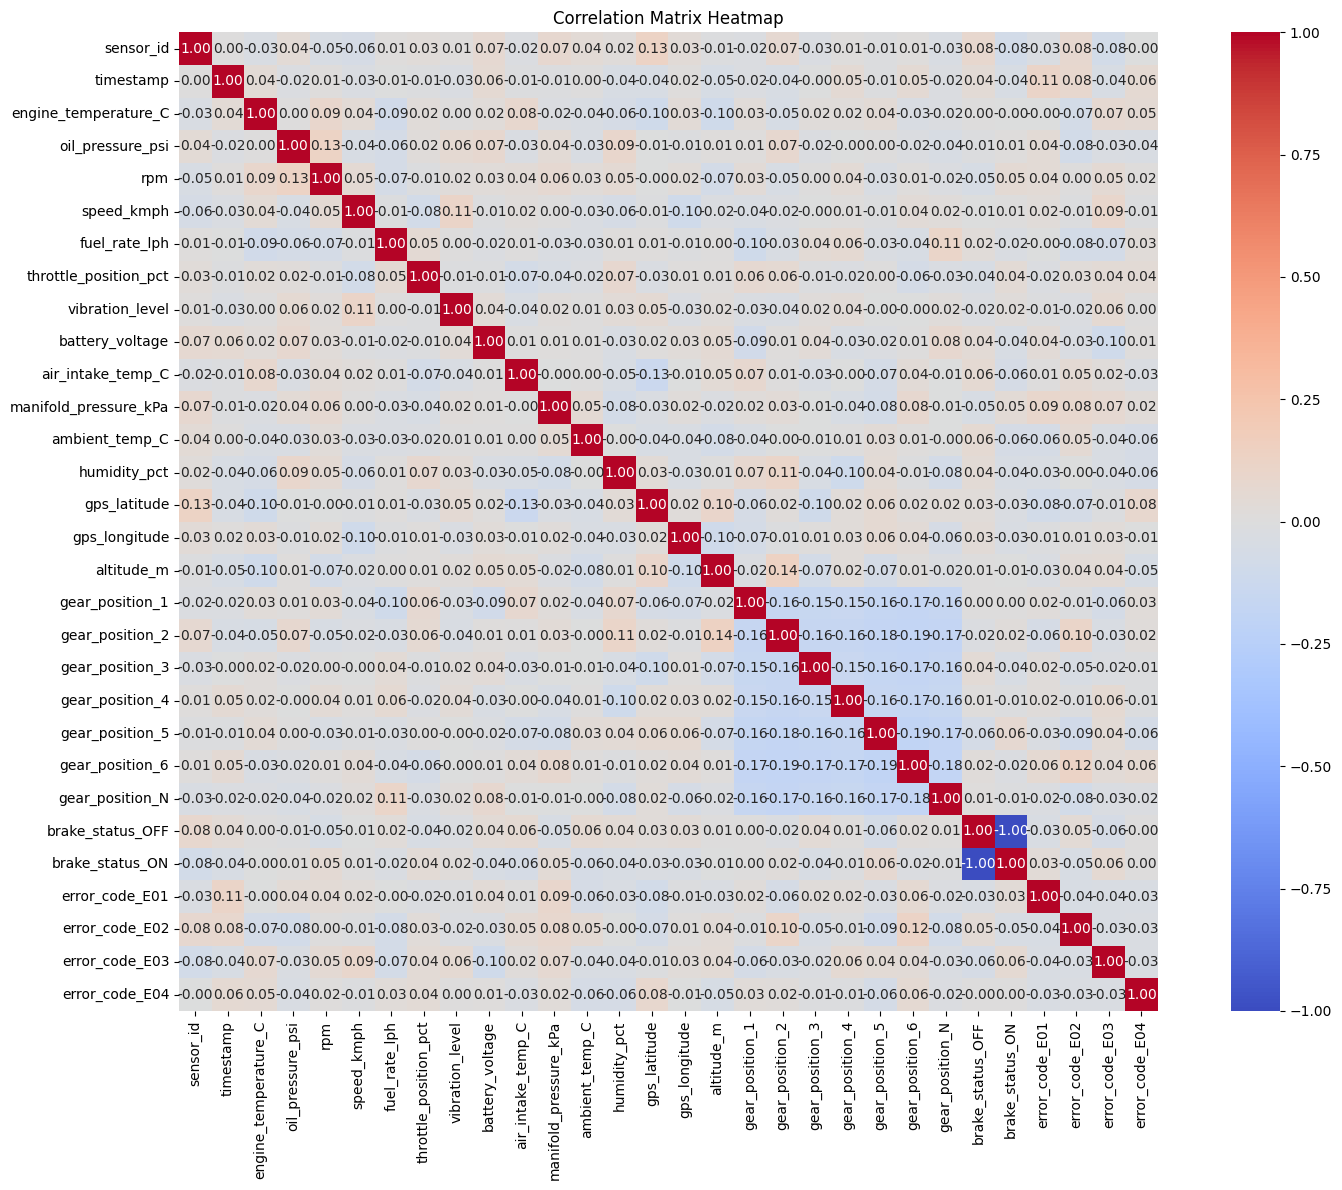

In [34]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

**Insights from Correlation Matrix**
*   Minimal Multicollinearity Among Engine Sensors. Most core engine-related features such as *engine_temperature_C*, *oil_pressure_psi*, *rpm*, *fuel_rate_lph*, *throttle_position_pct* show low to moderate correlation with each other.
*   Environmental variables such as *ambient_temp_C*, *humidity_pct*, *gps_latitude*, *altitude_m* show weak correlations with most engine metrics. This implies the vehicle's core operation is robust to ambient changes
*   *battery_voltage* shows low correlation with dynamic variables, confirming it's stable across operation modes. This could be used as a reference signal or to detect electrical faults when it deviates abnormally
*   *brake_status_ON* shows slight positive correlation with *throttle_position_pct* and weak negative correlation with *speed_kmph*. This reflects expected behavior (slowing down when braking), but can be used to detect abnormal braking.

# **Suggestions**

From here we can apply several ML solutions based on what is needed. My suggestions will be:
*   **Clustering** ----> This is to group similar operating conditions (ex:, driving patterns, environmental states) ----> Since data already numerical we could use **K-Means** or **DBScan**
*   **Regression** ----> This can be used to predict *fuel_rate_lph*, *engine_temperature_C*, or *vibration_level*.
*  **Classification** ----> This can be used to predict brake_status or derive a label from *error_code*


